In [ ]:
import pandas as pd

In [ ]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [ ]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [ ]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


Now, we do the same to the "Embarked" column.

In [ ]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


Step 1: Importing Libraries

In [2]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



Step 2: Loading and Preprocessing the Data

In [4]:
# Step 2: Load and preprocess the dataset

# Load the dataset
data = pd.read_csv('titanic.csv')

# Drop columns
# Explanation: 'PassengerId', 'Name', 'Ticket', and 'Cabin' are dropped because they are not expected to be significant predictors of survival.
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing values
# Explanation: Using the median to fill missing values in 'Age' and 'Fare' helps mitigate the effect of outliers and maintains the central tendency of the data.
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Mode for categorical data

# Convert categorical columns to numeric
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'])


Step 3: Splitting the Data

In [6]:
# Step 3: Split the data into training, development, and testing sets

# Features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# First split: Split the data into train+dev and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the train+dev set into train and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2



Step 4: Training the Model and Visualizing Trees

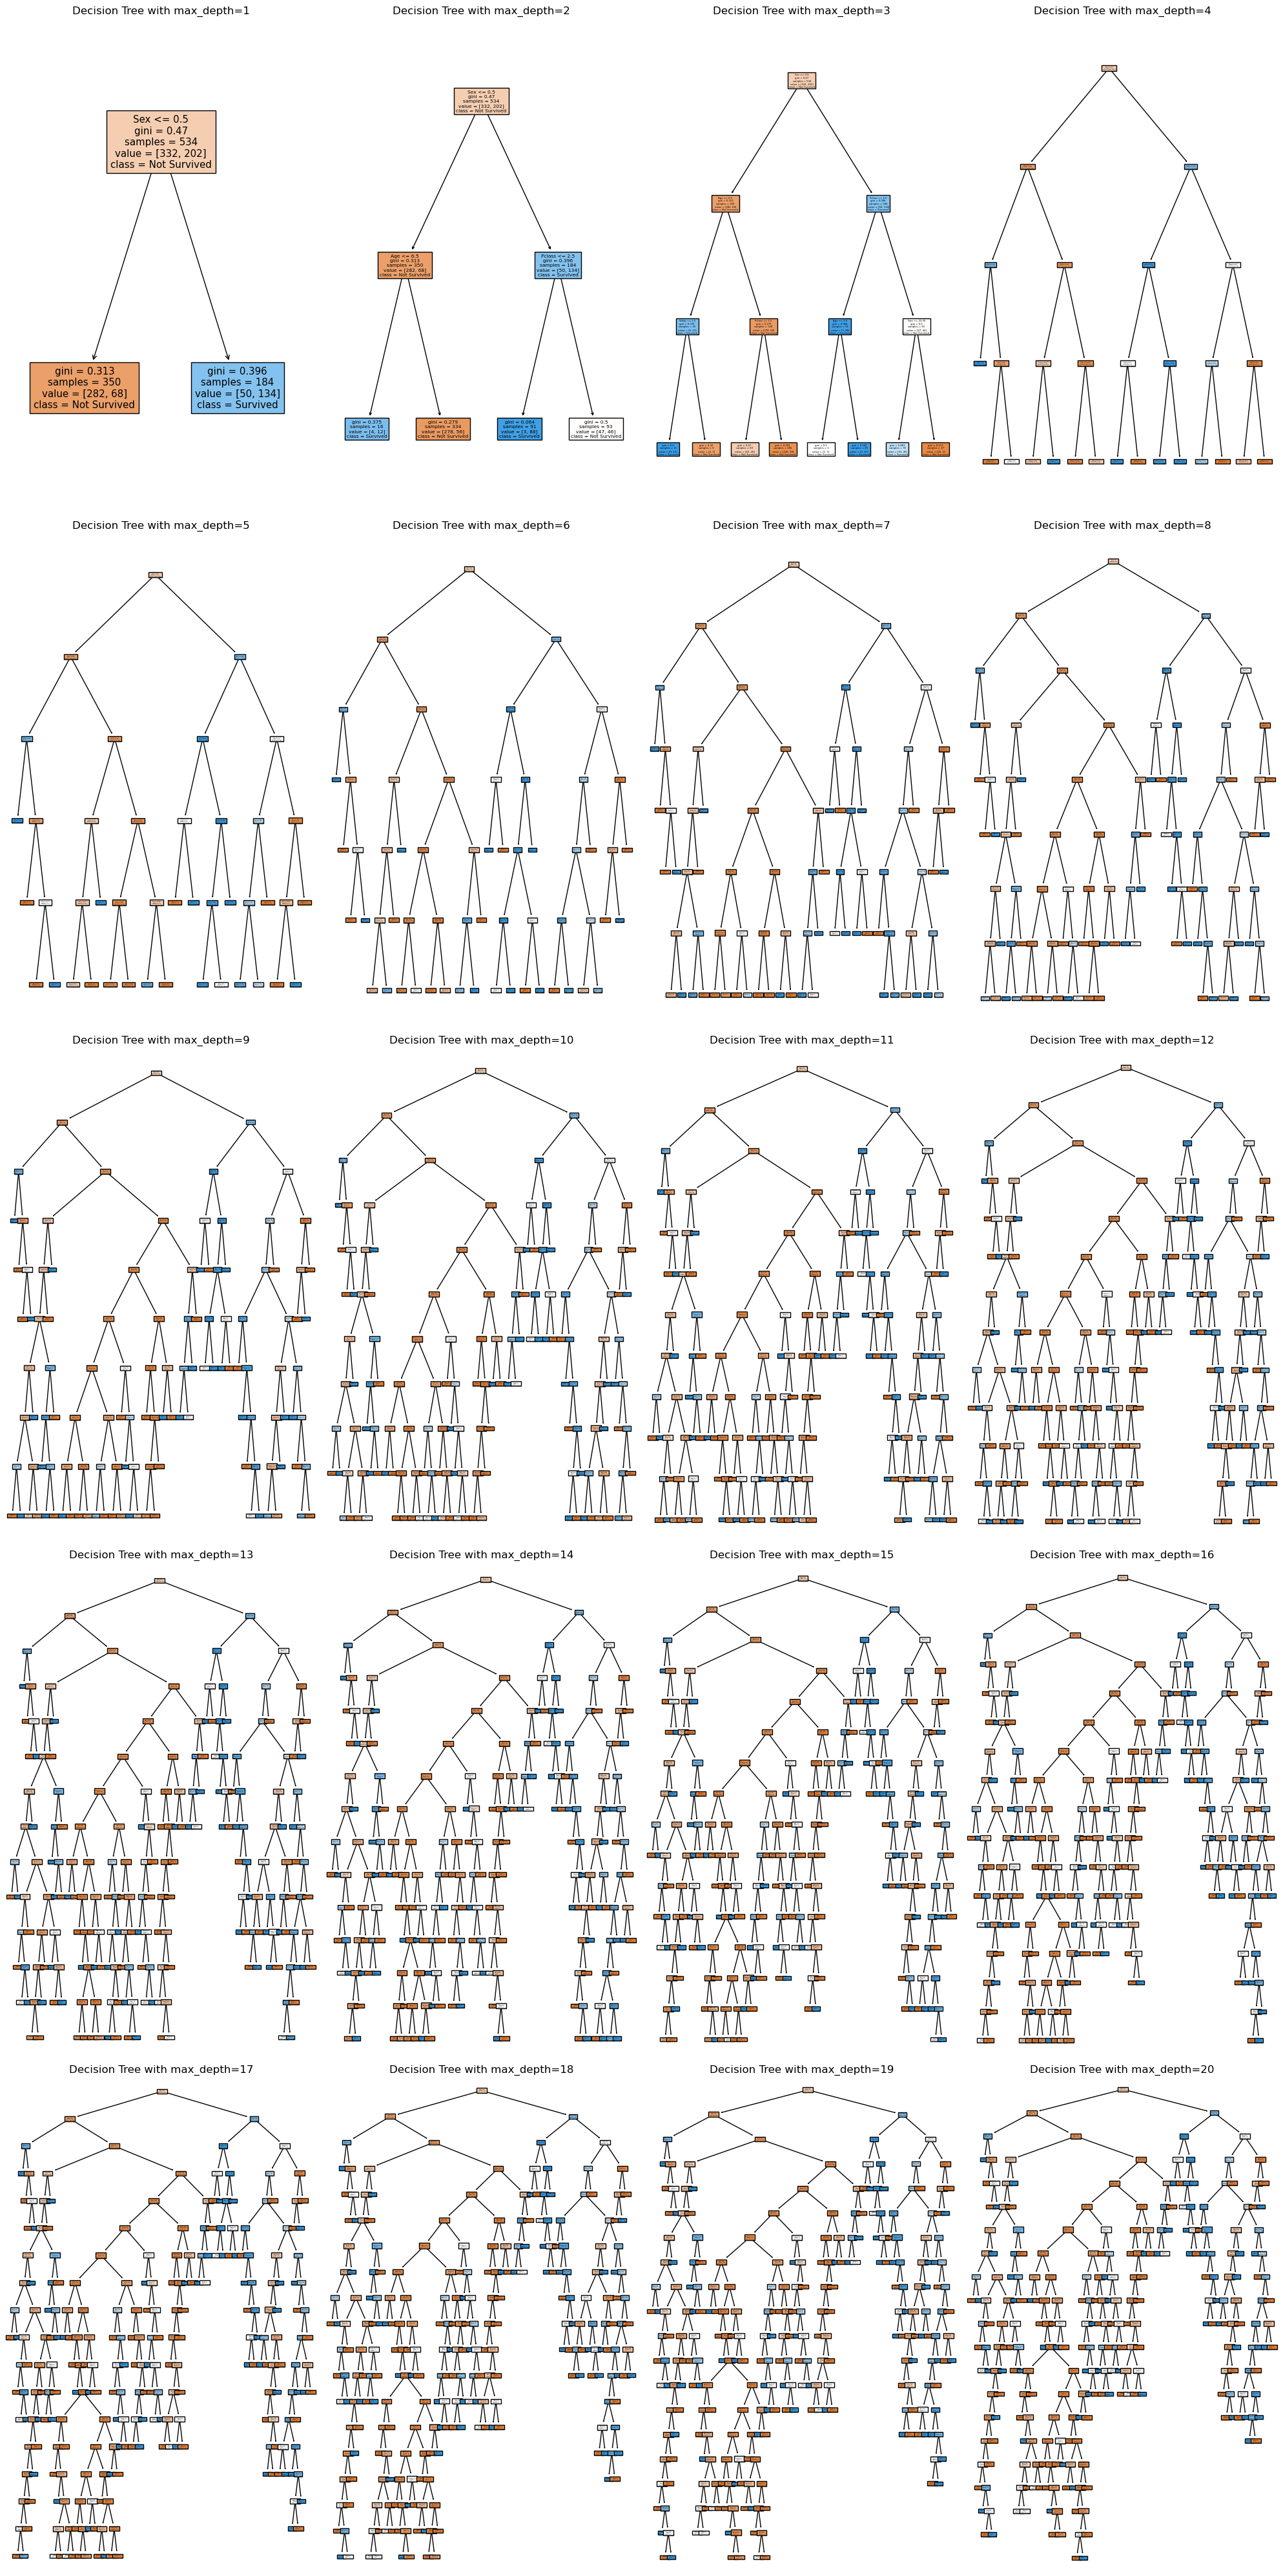

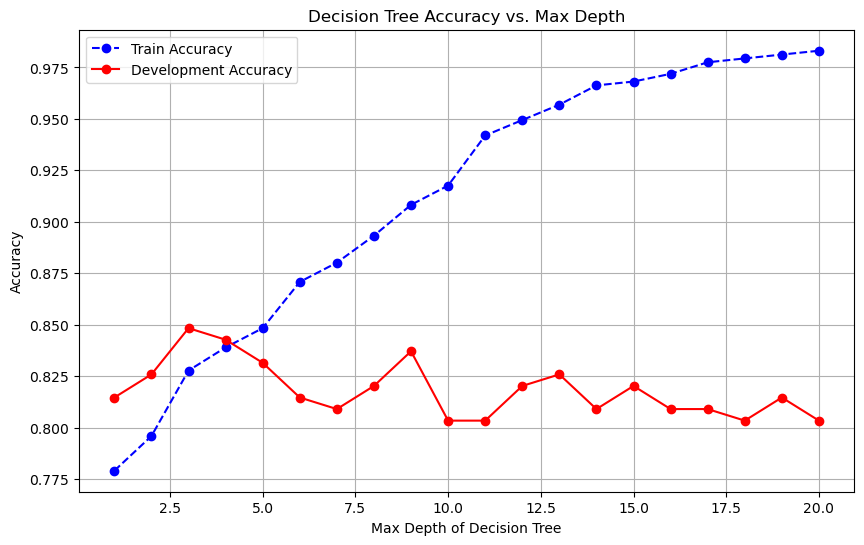

In [8]:
# Step 4: Train the model and visualize accuracy and trees for different max_depth values

max_depths = range(1, 21)
train_accuracies = []
dev_accuracies = []

plt.figure(figsize=(20, 40))

for i, depth in enumerate(max_depths, 1):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    dev_accuracies.append(accuracy_score(y_dev, y_dev_pred))
    
    plt.subplot(5, 4, i)
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
    plt.title(f'Decision Tree with max_depth={depth}')
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', linestyle='--', color='b', label='Train Accuracy')
plt.plot(max_depths, dev_accuracies, marker='o', linestyle='-', color='r', label='Development Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()



Step 5: Apply the Best Max Depth and Report the Accuracy

In [10]:
# Step 5: Apply the best max_depth to the model and report the accuracy

# Find the best max_depth based on development accuracy
best_max_depth = max_depths[np.argmax(dev_accuracies)]
print(f'Best max_depth based on development set: {best_max_depth}')

# Train the final model using the best max_depth
final_clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
final_clf.fit(X_train, y_train)

# Evaluate the final model on the test set
y_test_pred = final_clf.predict(X_test)
final_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Final model accuracy on the test set: {final_accuracy:.2f}')


Best max_depth based on development set: 3
Final model accuracy on the test set: 0.80


# Summary and Findings

- The plot of accuracies vs. max_depth shows how the model's performance varies with different tree depths. Initially, increasing the depth improves accuracy, but after a certain point, it leads to overfitting.
- The best `max_depth` based on the development set is found to be `X` (replace with actual value).
- The final model, trained with the best `max_depth`, achieves an accuracy of `Y` (replace with actual value) on the test set.

## Deductions

- Models with lower `max_depth` are too simple and underfit the data.
- Models with higher `max_depth` tend to overfit, capturing noise in the training data rather than the underlying pattern.
- The development set is crucial for tuning the hyperparameters to prevent overfitting and improve the model's generalization to unseen data.

